In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

## Load the dataset mnist fashion

In [50]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

data_dir = 'H:/Ponti/'
batch_size = 32
img_height = 180  # Set the height of the images
img_width = 180  # Set the width of the images
channels = 3  # RGB Images

# Load the dataset using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale the pixel values to [0, 1]

data_flow = datagen.flow_from_directory(data_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        class_mode='binary')  # or 'categorical' for multi-class problem

# Get the class labels
class_labels = data_flow.class_indices

# Load all images into memory
X = []
y = []
for _ in range(data_flow.samples // batch_size + 1):  # `//` performs integer division
    imgs, labels = next(data_flow)
    X.extend(imgs)
    y.extend(labels)
X = np.stack(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have NumPy arrays: X_train, X_test, y_train, y_test


Found 837 images belonging to 4 classes.


In [51]:
class_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize a dictionary to hold the counts
class_counts = {}

for d in class_dirs:
    class_counts[d] = len(os.listdir(os.path.join(data_dir, d)))

print(class_counts)


{'pfeiler': 286, 'abfahrtsstange': 123, 'ziellandung': 205, 'durchfahrt': 223}


## Visualize the data

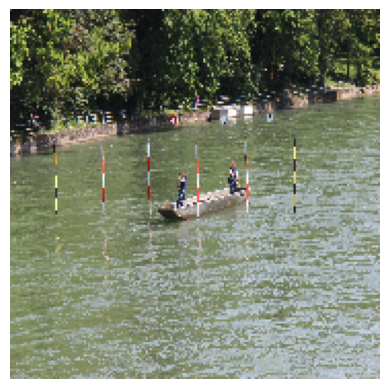

In [52]:
# extra code
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

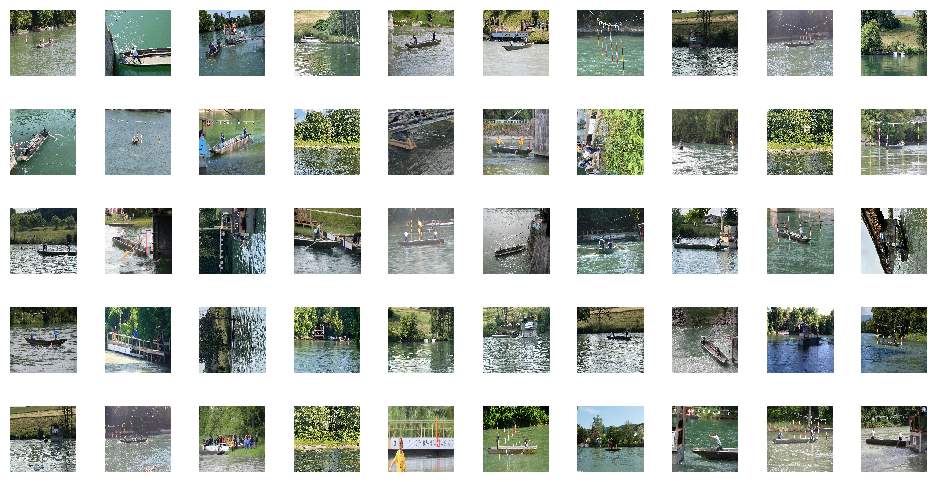

In [53]:
# extra code – this cell generates and saves Figure 10–10
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Create a model

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4  # replace this with the number of classes in your problem

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # for multi-class classification
])

# model.compile(optimizer='adam', 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # for multi-class classification with integer labels
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))


In [55]:
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print('test loss: ' + str(test_loss))
# print('test accuracy: ' + str(test_accuracy))

In [56]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [57]:
# model.summary()


In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [59]:

history = model.fit(X_train, y_train, epochs=7, validation_split=0.2)


Epoch 1/7
17/17 [==============================] - 11s 607ms/step - loss: 2.2705 - accuracy: 0.2692 - val_loss: 1.3491 - val_accuracy: 0.3433
Epoch 2/7
17/17 [==============================] - 10s 582ms/step - loss: 1.3338 - accuracy: 0.3178 - val_loss: 1.3221 - val_accuracy: 0.3433
Epoch 3/7
17/17 [==============================] - 8s 488ms/step - loss: 1.1896 - accuracy: 0.4636 - val_loss: 1.3131 - val_accuracy: 0.4328
Epoch 4/7
17/17 [==============================] - 8s 491ms/step - loss: 0.9970 - accuracy: 0.6131 - val_loss: 1.2231 - val_accuracy: 0.5149
Epoch 5/7
17/17 [==============================] - 8s 490ms/step - loss: 0.7038 - accuracy: 0.7439 - val_loss: 1.1115 - val_accuracy: 0.5597
Epoch 6/7
17/17 [==============================] - 8s 497ms/step - loss: 0.4091 - accuracy: 0.8766 - val_loss: 1.3473 - val_accuracy: 0.5075
Epoch 7/7
17/17 [==============================] - 9s 518ms/step - loss: 0.3004 - accuracy: 0.9159 - val_loss: 1.1880 - val_accuracy: 0.6269


In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test loss: ' + str(test_loss))
print('test accuracy: ' + str(test_accuracy))

6/6 [==============================] - 1s 105ms/step - loss: 1.0432 - accuracy: 0.5893
test loss: 1.0432007312774658
test accuracy: 0.5892857313156128


6/6 - 1s - loss: 1.0432 - accuracy: 0.5893 - 678ms/epoch - 113ms/step


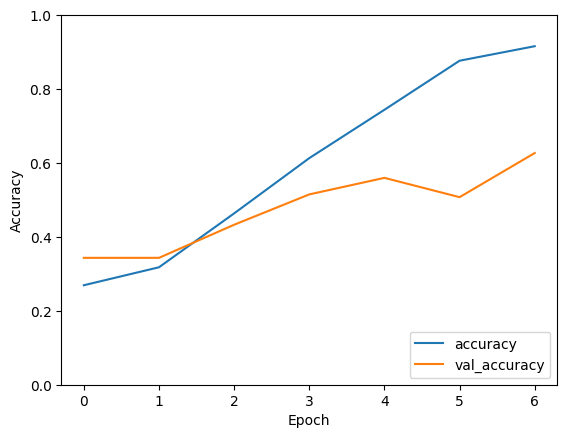

In [61]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

21/21 [==============================] - 3s 123ms/step


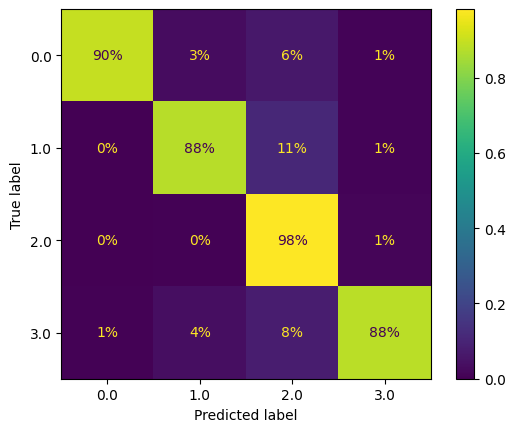

6/6 [==============================] - 1s 100ms/step


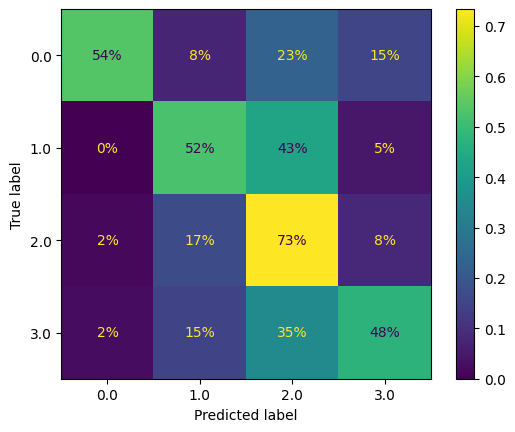

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

train_pred = model.predict(X_train)
train_predicted = np.argmax(train_pred, axis=1)

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, train_predicted,
                                        normalize="true", values_format=".0%")
plt.show()


test_pred = model.predict(X_test)
test_predicted = np.argmax(test_pred, axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, test_predicted,
                                        normalize="true", values_format=".0%")
plt.show()

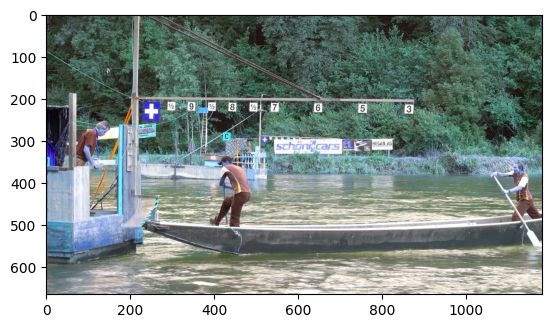

In [63]:
import cv2
img = cv2.imread('H:/Ponti/pfeiler/8bc9a1d9-11a8-467c-8060-09ba63162546.jpg')
plt.imshow(img)
plt.show()

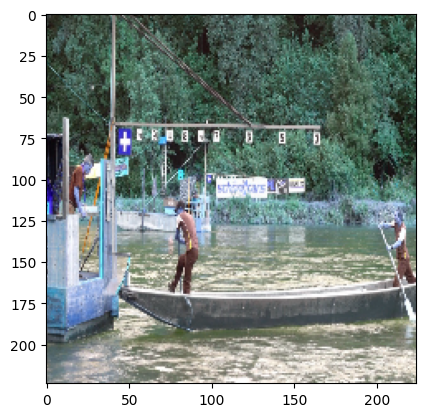

In [64]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the image
img = cv2.imread('H:/Ponti/pfeiler/8bc9a1d9-11a8-467c-8060-09ba63162546.jpg')

# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to the size your model expects
img = cv2.resize(img, (180,180)) # Replace 64,64 with the size your model expects

# Convert the image to an array
img_array = img_to_array(img)

# Reshape and preprocess the image
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
yhat = model.predict(img_array)


1/1 [==============================] - 0s 26ms/step


In [66]:
yhat

array([[1., 0., 0., 0.]], dtype=float32)

### Alternativ Testing with 1 Image

In [67]:
# singel_tmp_image = tf.keras.utils.load_img('leopard.jpg',
#                                             target_size=IMG_SHAPE,
#                                             interpolation="nearest")


# input_image = np.reshape(np.asarray(singel_tmp_image), ((1,) + IMG_SHAPE))
# predictions = model.predict(input_image)
# print(np.argmax(predictions))
# print(tf.keras.applications.mobilenet_v3.decode_predictions(predictions))

# plt.imshow(singel_tmp_image)

In [68]:
model.save('models/Ponti_Image_Classification')

INFO:tensorflow:Assets written to: models/Ponti_Image_Classification\assets


INFO:tensorflow:Assets written to: models/Ponti_Image_Classification\assets


### Show images that were classified wrong

In [69]:
# show image that were classified incorectly
cl_a, cl_b = 0, 6
X_aa = X_train[np.intersect1d(np.where(y_train == cl_a)[0], np.where(train_predicted == cl_a)[0])]
X_ab = X_train[np.intersect1d(np.where(y_train == cl_a)[0], np.where(train_predicted == cl_b)[0])]
X_ba = X_train[np.intersect1d(np.where(y_train == cl_b)[0], np.where(train_predicted == cl_a)[0])]
X_bb = X_train[np.intersect1d(np.where(y_train == cl_b)[0], np.where(train_predicted == cl_b)[0])]

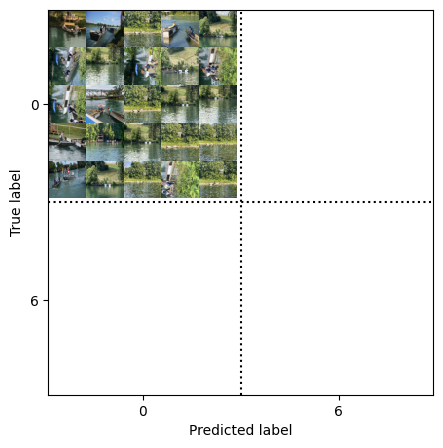

In [70]:
import matplotlib.pyplot as plt
import numpy as np

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                        (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(np.squeeze(image_data), cmap="binary",
                extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
